In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_excel('Analysis 3.xlsx')
data

,Date,USD
0,1968-03-22,40.0000
1,1968-03-25,40.2500
2,1968-03-26,41.1000
3,1968-03-27,40.3500
4,1968-03-28,39.6000
...,...,...
14231,2024-09-20,2621.9568
14232,2024-09-23,2628.3987
14233,2024-09-24,2656.6992
14234,2024-09-25,2656.8210


In [3]:
data.isnull().sum()

Date    0
USD     0
dtype: int64

In [4]:
print((data == 0).sum())
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date    0
USD     0
dtype: int64


Date    datetime64[ns]
USD            float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14236 entries, 0 to 14235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14236 non-null  datetime64[ns]
 1   USD     14236 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 222.6 KB


In [6]:
data.head()

,Date,USD
0,1968-03-22,40.00
1,1968-03-25,40.25
2,1968-03-26,41.10
3,1968-03-27,40.35
4,1968-03-28,39.60


In [7]:
data.shape

(14236, 2)

In [8]:
# we need to import LinerRegression Model
from sklearn.linear_model import LinearRegression

In [9]:
ls = LinearRegression()

In [10]:
ls

LinearRegression()

In [11]:
# liner regression -> (y = mx+c)

In [12]:
# scatter plot of the data 

<Axes: xlabel='Date', ylabel='USD Price'>

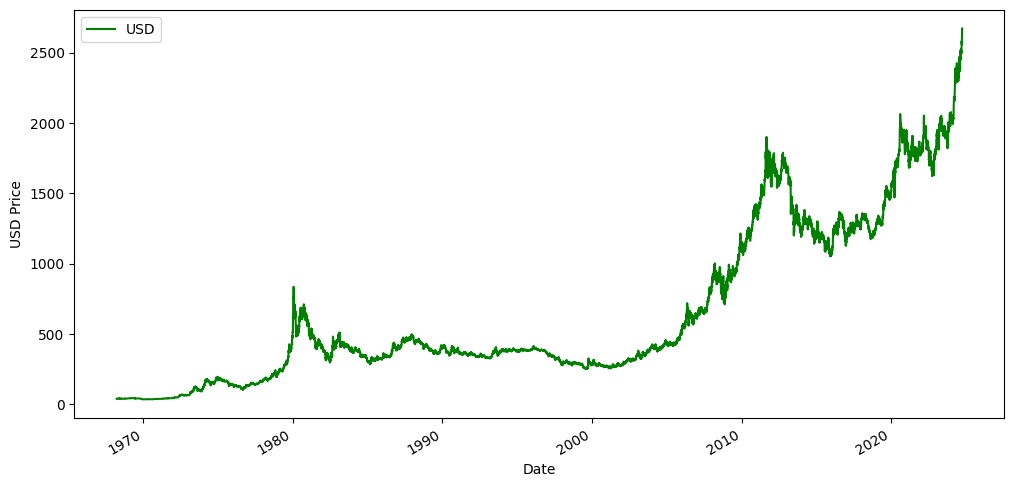

In [13]:
data.plot('Date', 'USD', kind='line', xlabel='Date', ylabel='USD Price', color='Green', figsize=(12, 6))

In [14]:
new_df = (data['Date'] > '2000-01-01').sum()

In [15]:
new_df

np.int64(6436)

In [16]:
new_data = data.tail(6436)
new_data

,Date,USD
7800,2000-01-03,288.5000
7801,2000-01-04,282.2000
7802,2000-01-05,280.7500
7803,2000-01-06,280.8500
7804,2000-01-07,281.5000
...,...,...
14231,2024-09-20,2621.9568
14232,2024-09-23,2628.3987
14233,2024-09-24,2656.6992
14234,2024-09-25,2656.8210


<Axes: title={'center': 'Gold Price Market Line Chart'}, xlabel='Date', ylabel='USD Price (Gold)'>

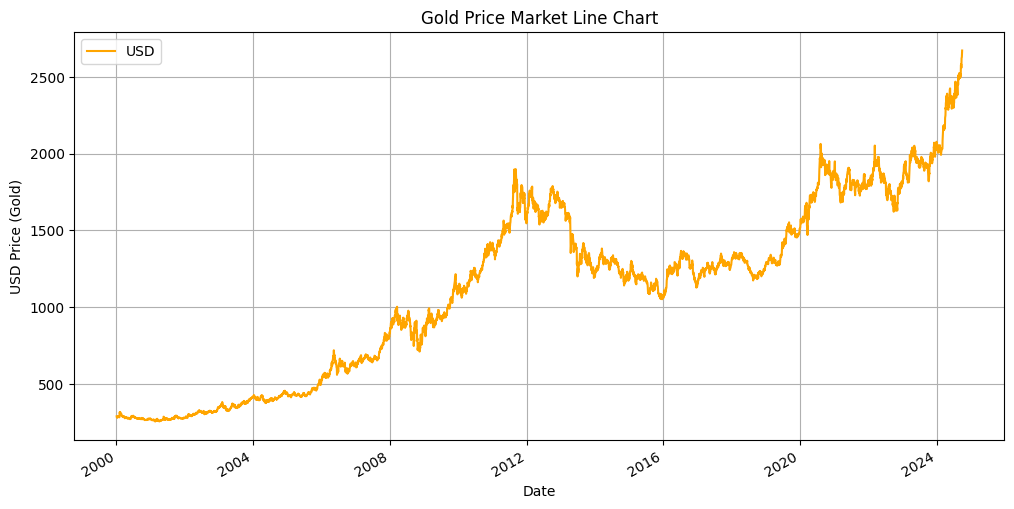

In [17]:
new_data.plot('Date', 'USD', kind='line', title='Gold Price Market Line Chart', xlabel='Date', ylabel='USD Price (Gold)', figsize=(12,6), color='orange', grid=True)

In [18]:
# we need to nupy array in our x values and y values before train the modal
x = np.array(new_data['Date'].map(pd.Timestamp.toordinal))
x

array([730122, 730123, 730124, ..., 739153, 739154, 739155])

In [19]:
y = np.array(new_data.USD.values)
y

array([ 288.5   ,  282.2   ,  280.75  , ..., 2656.6992, 2656.821 ,
       2671.59  ])

In [20]:
# we need to create two dimantional array
ls.fit(x.reshape(-1,1),y)

LinearRegression()

In [21]:
new_date = pd.Timestamp('2024-12-01')
new_x = np.array([new_date.toordinal()]).reshape(-1,1)
new_x

array([[739221]])

In [22]:
pred = ls.predict(new_x)
pred

array([2045.47444792])

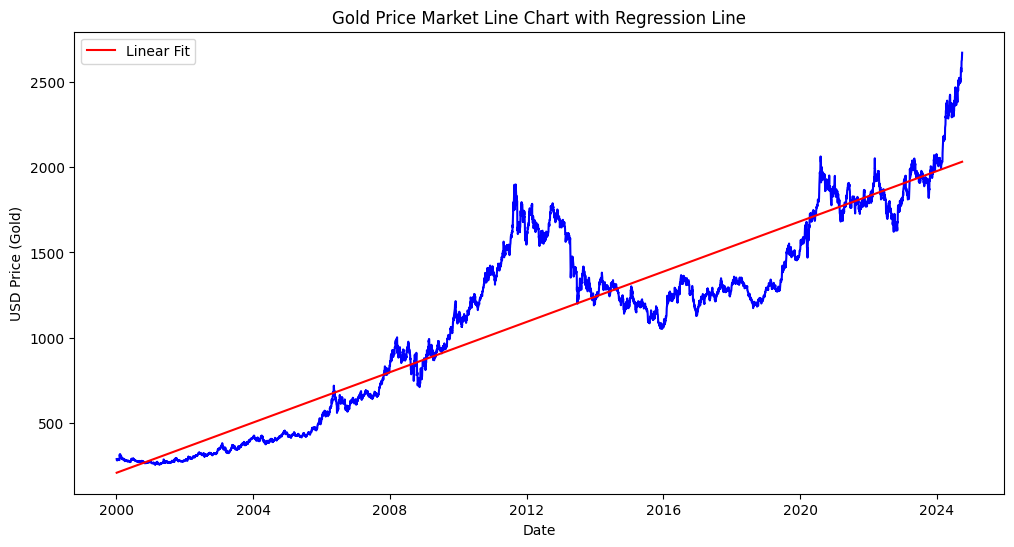

In [23]:
plt.figure(figsize=(12,6))
plt.plot(new_data['Date'], new_data['USD'], color='blue')
m, c = np.polyfit(x, y, 1)
plt.plot(new_data['Date'], m*x + c, label='Linear Fit', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('USD Price (Gold)')
plt.title('Gold Price Market Line Chart with Regression Line')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [24]:
ls.coef_

array([0.20192174])

In [25]:
ls.intercept_

np.float64(-147219.31597088254)

In [26]:
new_y = m*739221 + c
new_y

np.float64(2045.4744479170477)

Text(0, 0.5, 'Count')

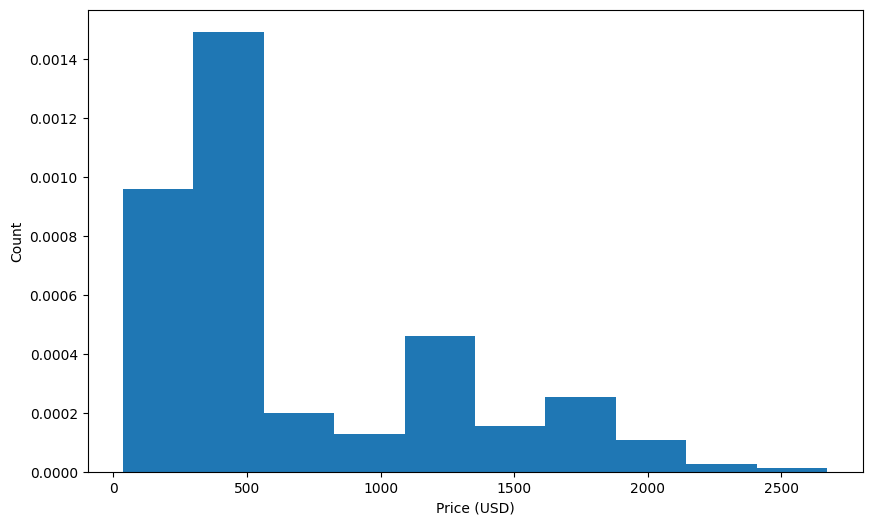

In [27]:
plt.figure(figsize=(10,6))
plt.hist(data['USD'], density=True)
plt.xlabel('Price (USD)')
plt.ylabel('Count')

In [28]:
data.describe()

,Date,USD
count,14236,14236.000000
mean,1997-03-25 23:54:20.129249792,668.640475
min,1968-03-22 00:00:00,34.950000
25%,1983-07-31 06:00:00,297.225000
50%,1997-05-19 12:00:00,391.875000
75%,2011-01-19 06:00:00,1170.970000
max,2024-09-26 00:00:00,2671.590000
std,NaN,572.196629


In [29]:
usd_mean = np.mean(data['USD'])
usd_mean

np.float64(668.6404745785333)

In [30]:
usd_std = np.std(data['USD'])
usd_std

np.float64(572.1765316843259)

In [31]:
# z-core
usd_z_core = (data['USD']-usd_mean)/usd_std
usd_z_core

0       -1.098683
1       -1.098246
2       -1.096760
3       -1.098071
4       -1.099382
           ...   
14231    3.413835
14232    3.425094
14233    3.474555
14234    3.474768
14235    3.500580
Name: USD, Length: 14236, dtype: float64

In [32]:
data['usd_z_score'] = usd_z_core
data.head()

,Date,USD,usd_z_score
0,1968-03-22,40.00,-1.098683
1,1968-03-25,40.25,-1.098246
2,1968-03-26,41.10,-1.096760
3,1968-03-27,40.35,-1.098071
4,1968-03-28,39.60,-1.099382


In [33]:
data[(data['usd_z_score'] > 3)]

,Date,USD,usd_z_score
14121,2024-04-19,2390.4517,3.009231
14139,2024-05-15,2386.0425,3.001525
14141,2024-05-17,2414.8900,3.051942
14142,2024-05-20,2425.1191,3.069819
14143,2024-05-21,2421.6377,3.063735
14176,2024-07-05,2391.4563,3.010987
14180,2024-07-11,2414.7786,3.051747
14181,2024-07-12,2411.2744,3.045623
14182,2024-07-15,2422.0740,3.064497
14183,2024-07-16,2468.5730,3.145764


In [34]:
(data['usd_z_score'] < -3).sum()

np.int64(0)

In [35]:
index_usd = []

In [36]:
index_usd.extend(data.index[data['usd_z_score'] > 3].tolist())

In [37]:
index_usd

[14121,
 14139,
 14141,
 14142,
 14143,
 14176,
 14180,
 14181,
 14182,
 14183,
 14184,
 14185,
 14186,
 14187,
 14188,
 14189,
 14191,
 14193,
 14194,
 14195,
 14196,
 14197,
 14198,
 14200,
 14201,
 14202,
 14203,
 14204,
 14205,
 14206,
 14207,
 14208,
 14209,
 14210,
 14211,
 14212,
 14213,
 14214,
 14215,
 14216,
 14217,
 14218,
 14219,
 14220,
 14221,
 14222,
 14223,
 14224,
 14225,
 14226,
 14227,
 14228,
 14229,
 14230,
 14231,
 14232,
 14233,
 14234,
 14235]

In [38]:
pross_data = data.drop(data.index[index_usd])
pross_data

,Date,USD,usd_z_score
0,1968-03-22,40.0000,-1.098683
1,1968-03-25,40.2500,-1.098246
2,1968-03-26,41.1000,-1.096760
3,1968-03-27,40.3500,-1.098071
4,1968-03-28,39.6000,-1.099382
...,...,...,...
14178,2024-07-09,2363.5845,2.962275
14179,2024-07-10,2371.0710,2.975359
14190,2024-07-25,2364.4995,2.963874
14192,2024-07-29,2383.5371,2.997146


In [39]:
data.shape[0],pross_data.shape[0]

(14236, 14177)

In [40]:
pross_data.head()

,Date,USD,usd_z_score
0,1968-03-22,40.00,-1.098683
1,1968-03-25,40.25,-1.098246
2,1968-03-26,41.10,-1.096760
3,1968-03-27,40.35,-1.098071
4,1968-03-28,39.60,-1.099382


In [41]:
pross_data = pross_data.drop('usd_z_score', axis=1)

In [42]:
pross_data.head()

,Date,USD
0,1968-03-22,40.00
1,1968-03-25,40.25
2,1968-03-26,41.10
3,1968-03-27,40.35
4,1968-03-28,39.60


Text(0, 0.5, 'Count')

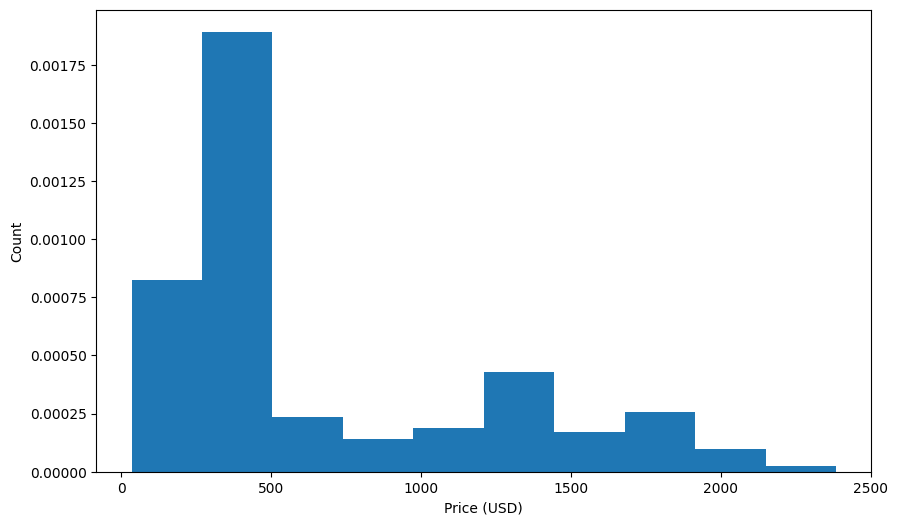

In [43]:
plt.figure(figsize=(10,6))
plt.hist(pross_data['USD'], density=True)
plt.xlabel('Price (USD)')
plt.ylabel('Count')

In [44]:
pros_x = pross_data['Date'].map(lambda date: date.toordinal())
pros_x

0        718513
1        718516
2        718517
3        718518
4        718519
          ...  
14178    739076
14179    739077
14190    739092
14192    739096
14199    739105
Name: Date, Length: 14177, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
pros_x.shape

(14177,)

In [47]:
x_np = np.array([pros_x]).reshape(-1,1)
y_np = np.array(pross_data['USD'])
x_np

array([[718513],
       [718516],
       [718517],
       ...,
       [739092],
       [739096],
       [739105]])

In [48]:
x_np.shape

(14177, 1)

In [49]:
y_np

array([  40.    ,   40.25  ,   41.1   , ..., 2364.4995, 2383.5371,
       2381.5349])

In [50]:
linear_model = LinearRegression()

In [51]:
linear_model.fit(x_np, y_np)

LinearRegression()

In [52]:
m = linear_model.coef_
m

array([0.08191698])

In [53]:
c = linear_model.intercept_
c

np.float64(-59061.915362116546)

-1679.6000000000001 20971.6


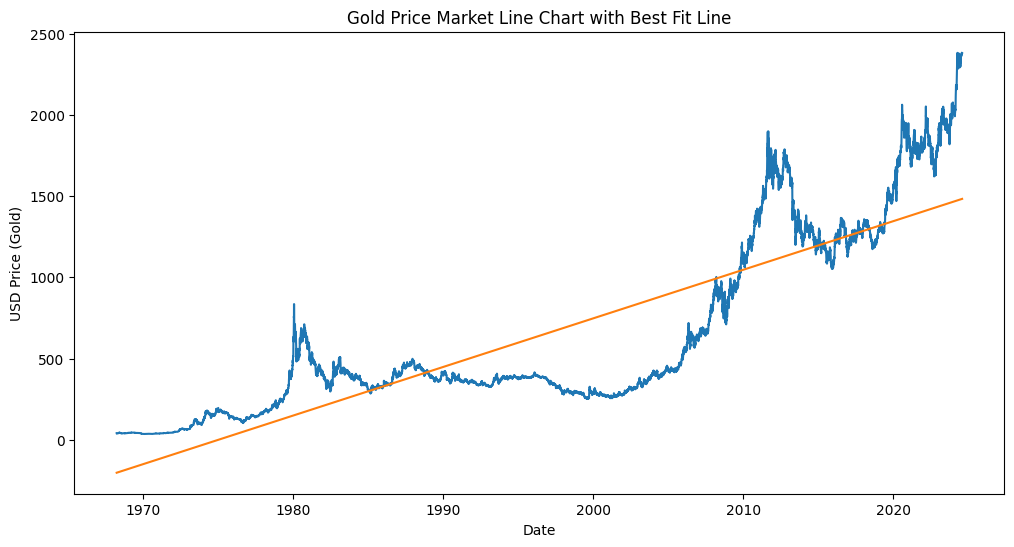

In [54]:
plt.figure(figsize=(12,6))
plt.plot(pross_data['Date'], pross_data['USD'])

plt.plot(pross_data['Date'], m*pros_x + c, label='Linear Fit')
plt.xlabel('Date')
plt.ylabel('USD Price (Gold)')
plt.title('Gold Price Market Line Chart with Best Fit Line')

left, right = plt.xlim()
print(left,right)